In [1]:
#IMPORT NECESSARY LIBRARIES
import os
from google.cloud import bigquery
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

In [2]:
#STATISTICAL AND DATA ANALYSIS LIBRARIES
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import numpy as np
from tableone import TableOne

In [3]:
#MACHINE LEARNING LIBRARIES
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from boruta import BorutaPy
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
#ML Interpretability Libraries 
import shap

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display


In [5]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'capstone-364219-57fd5f7fc37f.json'
client = bigquery.Client()

In [6]:
%%time
#LOAD IN DATA FROM BIG QUERY TO JUPYTER NOTEBOOK

def BIG_QUERY_COHORT_data_transfer(client):
    
    sql_query = "SELECT * FROM capstone-364219.AKI.AKI_STAGES"
    query_job = client.query(sql_query)
    AKI_STAGES = query_job.to_dataframe()
    
    sql_query = "SELECT * FROM capstone-364219.FEATURES.ICU_DETAIL"
    query_job = client.query(sql_query)
    ICU_DETAIL = query_job.to_dataframe()
    
    sql_query = "SELECT * FROM capstone-364219.FEATURES.AGE"
    query_job = client.query(sql_query)
    AGE = query_job.to_dataframe()
    
    sql_query = "SELECT * FROM capstone-364219.FEATURES.MORTALITY"
    query_job = client.query(sql_query)
    MORTALITY = query_job.to_dataframe()
    
    
    return AKI_STAGES, ICU_DETAIL, AGE, MORTALITY


def BIG_QUERY_FIRST_DAY_data_transfer(client):
    
    sql_query = "SELECT * FROM capstone-364219.FEATURES.GCS_FIRST_DAY"
    query_job = client.query(sql_query)
    GCS_FIRST_DAY = query_job.to_dataframe()
    
    sql_query = "SELECT * FROM capstone-364219.FEATURES.URINE_OUTPUT_FIRST_DAY"
    query_job = client.query(sql_query)
    URINE_OUTPUT_FIRST_DAY = query_job.to_dataframe()
    
    sql_query = "SELECT * FROM capstone-364219.FEATURES.LAB_FIRST_DAY"
    query_job = client.query(sql_query)
    LAB_FIRST_DAY = query_job.to_dataframe()
    
    sql_query = "SELECT * FROM capstone-364219.FEATURES.VITALS_FIRST_DAY"
    query_job = client.query(sql_query)
    VITALS_FIRST_DAY = query_job.to_dataframe()
    
    sql_query = "SELECT * FROM capstone-364219.FEATURES.BLOOD_GAS_FIRST_DAY"
    query_job = client.query(sql_query)
    BLOOD_GAS_FIRST_DAY = query_job.to_dataframe()
    
    return GCS_FIRST_DAY, URINE_OUTPUT_FIRST_DAY, LAB_FIRST_DAY, VITALS_FIRST_DAY, BLOOD_GAS_FIRST_DAY


def BIG_QUERY_SCORES_data_transfer(client):
    
    sql_query = "SELECT * FROM capstone-364219.FEATURES.SOFA"
    query_job = client.query(sql_query)
    SOFA = query_job.to_dataframe()
    
    sql_query = "SELECT * FROM capstone-364219.FEATURES.OASIS"
    query_job = client.query(sql_query)
    OASIS = query_job.to_dataframe()
    
    sql_query = "SELECT * FROM capstone-364219.FEATURES.SAPSII"
    query_job = client.query(sql_query)
    SAPSII = query_job.to_dataframe()
    
    return SOFA, OASIS, SAPSII
    
    
def BIG_QUERY_FEATURES_data_transfer(client):
   
    sql_query = "SELECT * FROM capstone-364219.FEATURES.CHARLSON"
    query_job = client.query(sql_query)
    CHARLSON = query_job.to_dataframe()

    sql_query = "SELECT * FROM capstone-364219.FEATURES.SEPSIS"
    query_job = client.query(sql_query)
    SEPSIS = query_job.to_dataframe()
    
    sql_query = "SELECT * FROM capstone-364219.FEATURES.HEIGHT"
    query_job = client.query(sql_query)
    HEIGHT = query_job.to_dataframe()
    
    sql_query = "SELECT * FROM capstone-364219.FEATURES.WEIGHT"
    query_job = client.query(sql_query)
    WEIGHT = query_job.to_dataframe()
     
    sql_query = "SELECT * FROM capstone-364219.FEATURES.CARDIAC_MARKER"
    query_job = client.query(sql_query)
    CARDIAC_MARKER = query_job.to_dataframe()
    
    sql_query = "SELECT * FROM capstone-364219.FEATURES.ENZYME"
    query_job = client.query(sql_query)
    ENZYME = query_job.to_dataframe()
    
    sql_query = "SELECT * FROM capstone-364219.FEATURES.ANTIBIOTICS"
    query_job = client.query(sql_query)
    ANTIBIOTICS = query_job.to_dataframe()
    
    sql_query = "SELECT * FROM capstone-364219.FEATURES.VENTILATION"
    query_job = client.query(sql_query)
    VENTILATION = query_job.to_dataframe()
    
    
    return CHARLSON, SEPSIS, HEIGHT, WEIGHT, CARDIAC_MARKER, ENZYME, ANTIBIOTICS, VENTILATION
    

#OBTAIN TABLES FROM BIG QUERY
AKI_STAGES, ICU_DETAIL, AGE, MORTALITY = BIG_QUERY_COHORT_data_transfer(client)

GCS_FIRST_DAY, URINE_OUTPUT_FIRST_DAY, LAB_FIRST_DAY, VITALS_FIRST_DAY, BLOOD_GAS_FIRST_DAY = BIG_QUERY_FIRST_DAY_data_transfer(client)

SOFA, OASIS, SAPSII = BIG_QUERY_SCORES_data_transfer(client)

CHARLSON, SEPSIS, HEIGHT, WEIGHT, CARDIAC_MARKER, ENZYME, ANTIBIOTICS, VENTILATION = BIG_QUERY_FEATURES_data_transfer(client)


CPU times: user 38.5 s, sys: 36.7 s, total: 1min 15s
Wall time: 4min 6s


In [7]:
#FUNCTION THAT CHECKS ROW COUNTS FOR EACH TABLE
def COHORT_ROW_COUNTS(AKI_STAGES, ICU_DETAIL, AGE, MORTALITY):
    AKI_STAGES_ROW_COUNT = len(AKI_STAGES)
    ICU_DETAIL_ROW_COUNT = len(ICU_DETAIL)
    AGE_ROW_COUNT = len(AGE)
    MORTALITY_ROW_COUNT = len(MORTALITY)
    
    if ((AKI_STAGES_ROW_COUNT == 4103559) & (ICU_DETAIL_ROW_COUNT == 76943) & (AGE_ROW_COUNT == 454324) & (MORTALITY_ROW_COUNT == 454324)):
        print("CATEGORY 1 ROW COUNTS ARE SATISFIED") 
        
        
def FIRST_DAY_ROW_COUNTS(URINE_OUTPUT_FIRST_DAY, LAB_FIRST_DAY, VITALS_FIRST_DAY, BLOOD_GAS_FIRST_DAY):
    URINE_OUTPUT_FIRST_DAY_ROW_COUNT = len(URINE_OUTPUT_FIRST_DAY)
    LAB_FIRST_DAY_ROW_COUNT = len(LAB_FIRST_DAY)
    VITALS_FIRST_DAY_ROW_COUNT = len(VITALS_FIRST_DAY)
    BLOOD_GAS_FIRST_DAY_ROW_COUNT = len(BLOOD_GAS_FIRST_DAY)
        
    if ((URINE_OUTPUT_FIRST_DAY_ROW_COUNT == 76943) & (LAB_FIRST_DAY_ROW_COUNT == 76943) & (VITALS_FIRST_DAY_ROW_COUNT == 76943) & (BLOOD_GAS_FIRST_DAY_ROW_COUNT == 76943)):
        print("CATEGORY 2 ROW COUNTS ARE SATISFIED") 
        
        
def SCORE_ROW_COUNTS(OASIS, SAPSII, SOFA):
    OASIS_ROW_COUNT = len(OASIS)
    SAPSII_ROW_COUNT = len(SAPSII)
    SOFA_ROW_COUNT = len(SOFA)
        
    if ((SOFA_ROW_COUNT == 6354195) & (OASIS_ROW_COUNT == 76943) & (SAPSII_ROW_COUNT == 76943)):
        print("CATEGORY 3 ROW COUNTS ARE SATISFIED")
        
def FEATURES_ROW_COUNTS(SEPSIS, CHARLSON, WEIGHT, HEIGHT, CARDIAC_MARKER, ENZYME):
    SEPSIS_ROW_COUNT = len(SEPSIS)
    CHARLSON_ROW_COUNT = len(CHARLSON)
    WEIGHT_ROW_COUNT = len(WEIGHT)
    HEIGHT_ROW_COUNT = len(HEIGHT)
    CARDIAC_MARKER_ROW_COUNT = len(CARDIAC_MARKER)
    ENZYME_ROW_COUNT = len(ENZYME)
    
    if ((CHARLSON_ROW_COUNT == 454324) & (SEPSIS_ROW_COUNT == 34678) & (WEIGHT_ROW_COUNT == 286705) & (HEIGHT_ROW_COUNT == 35186) & (CARDIAC_MARKER_ROW_COUNT == 310818) & (ENZYME_ROW_COUNT == 1724519)):
        print("CATEGORY 4 ROW COUNTS ARE SATISFIED") 

COHORT_ROW_COUNTS(AKI_STAGES, ICU_DETAIL, AGE, MORTALITY)
FIRST_DAY_ROW_COUNTS(URINE_OUTPUT_FIRST_DAY, LAB_FIRST_DAY, VITALS_FIRST_DAY, BLOOD_GAS_FIRST_DAY)
SCORE_ROW_COUNTS(OASIS, SAPSII, SOFA)
FEATURES_ROW_COUNTS(SEPSIS, CHARLSON, WEIGHT, HEIGHT, CARDIAC_MARKER, ENZYME)

CATEGORY 1 ROW COUNTS ARE SATISFIED
CATEGORY 2 ROW COUNTS ARE SATISFIED
CATEGORY 3 ROW COUNTS ARE SATISFIED
CATEGORY 4 ROW COUNTS ARE SATISFIED


In [8]:
#PROCESS COHORT DATA TO CREATE COHORT

def AKI_STAGES_PROCESSING(AKI_STAGES):
    
    AKI_STAGES = AKI_STAGES.sort_values(by='stay_id', ascending=False)
    AKI_STAGES = AKI_STAGES[(AKI_STAGES.aki_stage != 0)]
    
    AKI_STAGES = AKI_STAGES[['subject_id', 'hadm_id', 'stay_id', 'aki_stage']]
    
    AKI_STAGES = AKI_STAGES.drop_duplicates(subset=['stay_id'])
    AKI_STAGES = AKI_STAGES.drop_duplicates(subset=['hadm_id'])
    AKI_STAGES = AKI_STAGES.drop_duplicates(subset=['subject_id'])

    return AKI_STAGES


def ICU_DETAIL_PROCESSING(ICU_DETAIL):

    ICU_DETAIL = ICU_DETAIL[ICU_DETAIL.first_icu_stay==True]
    ICU_DETAIL = ICU_DETAIL.sort_values(by='admittime')

    ICU_DETAIL = ICU_DETAIL.drop_duplicates(subset=['stay_id'])
    ICU_DETAIL = ICU_DETAIL.drop_duplicates(subset=['hadm_id'])
    ICU_DETAIL = ICU_DETAIL.drop_duplicates(subset=['subject_id'])
    
    ICU_DETAIL = ICU_DETAIL[(ICU_DETAIL.los_icu > 0.25) & (ICU_DETAIL.los_icu < 180)]
    #ICU_DETAIL = ICU_DETAIL[['subject_id', 'hadm_id', 'stay_id', 'gender', 'race', 'los_icu']]
    ICU_DETAIL = ICU_DETAIL[['subject_id', 'hadm_id', 'stay_id', 'gender', 'los_icu']]
    
    return ICU_DETAIL


def AGE_PROCESSING(AGE):
    AGE = AGE[['subject_id', 'hadm_id', 'age']]
    AGE = AGE[(AGE.age > 18) & (AGE.age < 90)]

    return AGE

def MORTALITY_PROCESSING(MORTALITY):
    MORTALITY = MORTALITY[['hadm_id', 'HospMort180day']]
    MORTALITY = MORTALITY.drop_duplicates(subset=['hadm_id'])
    
    return MORTALITY

def COHORT_PROCESSING(AKI_STAGES, ICU_DETAIL, AGE, MORTALITY):
    AKI_STAGES = AKI_STAGES_PROCESSING(AKI_STAGES)
    ICU_DETAIL = ICU_DETAIL_PROCESSING(ICU_DETAIL)
    AGE = AGE_PROCESSING(AGE)
    MORTALITY = MORTALITY_PROCESSING(MORTALITY)
    
    df = AKI_STAGES.merge(ICU_DETAIL)
    df = pd.merge(df, AGE)
    df = pd.merge(df, MORTALITY)
    
    return df


In [9]:
#PROCESS PATIENT DATA RELEVANT TO 24hrs AFTER ADMISSION

def GCS_FIRST_DAY_PROCESSING(GCS_FIRST_DAY):
    GCS_FIRST_DAY = GCS_FIRST_DAY[['subject_id', 'stay_id', 'gcs_min']]
    
    return GCS_FIRST_DAY


def LAB_FIRST_DAY_PROCESSING(LAB_FIRST_DAY):
    LAB_FIRST_DAY = LAB_FIRST_DAY[['subject_id', 'stay_id', 'hematocrit_min', 'hematocrit_max', 'wbc_min', 'wbc_max', 
                                   'platelets_min', 'platelets_max', 'hemoglobin_min', 'hemoglobin_max',
                                   'glucose_min', 'glucose_max', 'bun_min', 'bun_max', 'creatinine_min', 'creatinine_max',
                                   'potassium_min', 'potassium_max', 'sodium_min', 'sodium_max', 'chloride_min','chloride_max',
                                   'calcium_min', 'calcium_max', 'ptt_min', 'ptt_max', 'pt_min', 'pt_max', 'inr_min', 'inr_max'
                                 ]]
    
    return LAB_FIRST_DAY


def VITALS_FIRST_DAY_PROCESSING(VITALS_FIRST_DAY):
    VITALS_FIRST_DAY = VITALS_FIRST_DAY[['subject_id', 'stay_id', 'heart_rate_mean', 'sbp_mean', 
                                         'dbp_mean', 'mbp_mean', 'resp_rate_mean', 'temperature_mean', 
                                         'spo2_mean', 'glucose_mean']]
    
    return VITALS_FIRST_DAY


def URINE_OUTPUT_FIRST_DAY_PROCESSING(URINE_OUTPUT_FIRST_DAY):
    
    URINE_OUTPUT_FIRST_DAY = URINE_OUTPUT_FIRST_DAY[['subject_id', 'stay_id', 'urineoutput']]
    
    return URINE_OUTPUT_FIRST_DAY


def BLOOD_GAS_FIRST_DAY_FIRST_DAY_PROCESSING(BLOOD_GAS_FIRST_DAY):
    BLOOD_GAS_FIRST_DAY = BLOOD_GAS_FIRST_DAY[['subject_id', 'stay_id', 'lactate_min', 'lactate_max', 'ph_min', 'ph_max', 
                                               'pco2_min', 'pco2_max', 'bicarbonate_min', 'bicarbonate_max']]

    return BLOOD_GAS_FIRST_DAY


def FIRST_DAY_PROCESSING(df, GCS_FIRST_DAY, LAB_FIRST_DAY, VITALS_FIRST_DAY, URINE_OUTPUT_FIRST_DAY, BLOOD_GAS_FIRST_DAY):
    GCS_FIRST_DAY = GCS_FIRST_DAY_PROCESSING(GCS_FIRST_DAY)
    LAB_FIRST_DAY = LAB_FIRST_DAY_PROCESSING(LAB_FIRST_DAY)
    VITALS_FIRST_DAY = VITALS_FIRST_DAY_PROCESSING(VITALS_FIRST_DAY)
    URINE_OUTPUT_FIRST_DAY = URINE_OUTPUT_FIRST_DAY_PROCESSING(URINE_OUTPUT_FIRST_DAY)
    #BLOOD_GAS_FIRST_DAY = BLOOD_GAS_FIRST_DAY_FIRST_DAY_PROCESSING(BLOOD_GAS_FIRST_DAY)
    
    df = pd.merge(df, GCS_FIRST_DAY, on=['subject_id', 'stay_id'], how='left', suffixes=('', '_drop'))
    df = pd.merge(df, LAB_FIRST_DAY, on=['subject_id', 'stay_id'], how='left', suffixes=('', '_drop'))
    df = pd.merge(df, VITALS_FIRST_DAY, on=['subject_id', 'stay_id'], how='left', suffixes=('', '_drop'))
    df = pd.merge(df, URINE_OUTPUT_FIRST_DAY, on=['subject_id', 'stay_id'], how='left', suffixes=('', '_drop'))
    #df = pd.merge(df, BLOOD_GAS_FIRST_DAY, on=['subject_id', 'stay_id'], how='left', suffixes=('', '_drop'))

    return df


In [10]:
def OASIS_PROCESSING(OASIS):
    
    OASIS = OASIS[['subject_id', 'hadm_id', 'stay_id', 'oasis']]

    return OASIS


def SAPSII_PROCESSING(SAPSII):
    
    SAPSII = SAPSII[['subject_id', 'hadm_id', 'stay_id', 'sapsii']]
    
    return SAPSII


def SOFA_PROCESSING(SOFA):
    
    SOFA = SOFA.sort_values(by='stay_id')
    SOFA = SOFA.drop_duplicates(subset=['stay_id'])
    
    SOFA = SOFA[['stay_id', 'sofa_24hours']]
    
    return SOFA


def SCORE_PROCESSING(df, OASIS, SAPSII, SOFA):
    OASIS = OASIS_PROCESSING(OASIS)
    SAPSII = SAPSII_PROCESSING(SAPSII)
    SOFA = SOFA_PROCESSING(SOFA)
    
    df = pd.merge(df, OASIS, on=['subject_id', 'hadm_id', 'stay_id'], how='left', suffixes=('', '_drop'))
    df = pd.merge(df, SAPSII, on=['subject_id', 'hadm_id', 'stay_id'], how='left', suffixes=('', '_drop'))
    df = pd.merge(df, SOFA, on=['stay_id'], how='left', suffixes=('', '_drop'))
    
    return df 


In [11]:
#PROCESS ESSENTIAL FEATURES

def SEPSIS_PROCESSING(SEPSIS):

    SEPSIS = SEPSIS[['subject_id', 'stay_id', 'sepsis3']]
    SEPSIS['sepsis3'] = np.where(SEPSIS['sepsis3'] == True, 1, 0)
    
    return SEPSIS


def CHARLSON_PROCESSING(CHARLSON):
    CHARLSON = CHARLSON[['subject_id', 'hadm_id', 'myocardial_infarct', 'congestive_heart_failure', 'diabetes_without_cc', 'diabetes_with_cc',
                         'malignant_cancer', 'severe_liver_disease', 'metastatic_solid_tumor', 'charlson_comorbidity_index',
                         'chronic_pulmonary_disease', 'aids', 'cerebrovascular_disease', 'mild_liver_disease']]

    return CHARLSON


def WEIGHT_PROCESSING(WEIGHT):
    WEIGHT = WEIGHT[WEIGHT.weight_type == 'admit']
    WEIGHT = WEIGHT[['stay_id', 'weight']]

    return WEIGHT


def HEIGHT_PROCESSING(HEIGHT):
    
    HEIGHT = HEIGHT[['subject_id', 'stay_id', 'height']]
    
    return HEIGHT


def CARDIAC_MARKER_PROCESSING(CARDIAC_MARKER):
    CARDIAC_MARKER = CARDIAC_MARKER.sort_values(by='charttime')
    
    CARDIAC_MARKER = CARDIAC_MARKER.drop_duplicates(subset=['hadm_id'])
    CARDIAC_MARKER = CARDIAC_MARKER.drop_duplicates(subset=['subject_id'])
    
    CARDIAC_MARKER = CARDIAC_MARKER.drop(['charttime', 'specimen_id'], axis=1)
    
    return CARDIAC_MARKER


def ENZYME_PROCESSING(ENZYME):
    ENZYME = ENZYME.sort_values(by='charttime')
    
    ENZYME = ENZYME.drop_duplicates(subset=['hadm_id'])
    ENZYME = ENZYME.drop_duplicates(subset=['subject_id'])
    
    ENZYME = ENZYME.drop(['charttime', 'specimen_id'], axis=1)
    
    return ENZYME


def ANTIBIOTICS_PROCESSING(ANTIBIOTICS):
    
    ANTIBIOTICS = ANTIBIOTICS.sort_values(by='hadm_id')
    
    ANTIBIOTICS = ANTIBIOTICS.drop_duplicates(subset=['hadm_id'])
    ANTIBIOTICS = ANTIBIOTICS.drop_duplicates(subset=['subject_id'])
    
    ANTIBIOTICS = ANTIBIOTICS.drop(['starttime', 'stoptime'], axis=1)
    
    return ANTIBIOTICS


def VENTILATION_PROCESSING(VENTILATION):
    VENTILATION = VENTILATION.sort_values(by='stay_id')
    VENTILATION = VENTILATION.drop_duplicates(subset=['stay_id'])
    
    VENTILATION = VENTILATION.drop(['starttime', 'endtime'], axis=1)
    
    return VENTILATION


def FEAUTURE_PROCESSING(df, SEPSIS, CHARLSON, WEIGHT, HEIGHT, CARDIAC_MARKER, ENZYME, ANTIBIOTICS, VENTILATION):
    SEPSIS = SEPSIS_PROCESSING(SEPSIS)
    CHARLSON = CHARLSON_PROCESSING(CHARLSON)
    WEIGHT = WEIGHT_PROCESSING(WEIGHT)
    HEIGHT = HEIGHT_PROCESSING(HEIGHT)
    #CARDIAC_MARKER = CARDIAC_MARKER_PROCESSING(CARDIAC_MARKER)
    #ENZYME = ENZYME_PROCESSING(ENZYME)
    #ANTIBIOTICS = ANTIBIOTICS_PROCESSING(ANTIBIOTICS)
    VENTILATION = VENTILATION_PROCESSING(VENTILATION)
    
    df = pd.merge(df, SEPSIS, on=['subject_id', 'stay_id'], how='left', suffixes=('', '_drop'))
    df = pd.merge(df, CHARLSON, on=['subject_id', 'hadm_id'], how='left', suffixes=('', '_drop'))
    df = pd.merge(df, WEIGHT, on=['stay_id'], how='left', suffixes=('', '_drop'))
    df = pd.merge(df, HEIGHT, on=['subject_id', 'stay_id'], how='left', suffixes=('', '_drop'))
    #df = pd.merge(df, CARDIAC_MARKER, on=['subject_id', 'hadm_id'], how='left', suffixes=('', '_drop'))
    #df = pd.merge(df, ENZYME, on=['subject_id', 'hadm_id'], how='left', suffixes=('', '_drop'))
    #df = pd.merge(df, ANTIBIOTICS, on=['subject_id', 'hadm_id'], how='left', suffixes=('', '_drop'))
    df = pd.merge(df, VENTILATION, on=['stay_id'], how='left', suffixes=('', '_drop'))
    
    return df


In [12]:
%%time
#MERGE RELEVENT FEATURES
def FEATURE_MERGE(AKI_STAGES, ICU_DETAIL, AGE, MORTALITY, 
                  GCS_FIRST_DAY, LAB_FIRST_DAY, VITALS_FIRST_DAY, URINE_OUTPUT_FIRST_DAY, BLOOD_GAS_FIRST_DAY,
                  SEPSIS, CHARLSON, WEIGHT, HEIGHT, CARDIAC_MARKER, ENZYME, OASIS, SAPSII, SOFA, ANTIBIOTICS, VENTILATION):
    df = COHORT_PROCESSING(AKI_STAGES, ICU_DETAIL, AGE, MORTALITY)
    df = FIRST_DAY_PROCESSING(df, GCS_FIRST_DAY, LAB_FIRST_DAY, VITALS_FIRST_DAY, URINE_OUTPUT_FIRST_DAY, BLOOD_GAS_FIRST_DAY)
    df = SCORE_PROCESSING(df, OASIS, SAPSII, SOFA)
    df = FEAUTURE_PROCESSING(df, SEPSIS, CHARLSON, WEIGHT, HEIGHT, CARDIAC_MARKER, ENZYME, ANTIBIOTICS, VENTILATION)
    
    return df



CPU times: user 10.4 s, sys: 13.6 s, total: 24 s
Wall time: 27.7 s


In [27]:
%%time
#PROCESS AND FINALIZE DF FOR TRAINING, VALIDATION, TESTING

def DROP_DUPLICATE_COL(df):
    df.drop([col for col in df.columns if 'drop' in col], axis=1, inplace=True)
    
    return df 


def PERCENT_MISSING(df):
    Missing_Dict = {}
    for col in df.columns:
        Percent_Missingness = ((df[col].isnull().sum()/len(df)) * 100)
        if Percent_Missingness > 20:
            Missing_Dict[col] = Percent_Missingness
            df.drop(col, inplace=True, axis=1)
            
    return df, Missing_Dict 


def CLEAN(df):
    df = df.drop(['subject_id', 'hadm_id', 'stay_id'], axis=1)
    
    return df


def ONE_HOT_ENCODING(df):
    categorical_cols = ['gender', 'ventilation_status']
    df = pd.get_dummies(df, columns = categorical_cols)
    
    return df


def IMPUTER(df):
    impute_it = IterativeImputer()
    df[:] = impute_it.fit_transform(df)
    
    return df


def FINALIZE(df):
    df = DROP_DUPLICATE_COL(df)
    df, Missing_Dict = PERCENT_MISSING(df)
    df = CLEAN(df)
    df = ONE_HOT_ENCODING(df)
    df = IMPUTER(df)
    
    return df



CPU times: user 174 µs, sys: 1.7 ms, total: 1.87 ms
Wall time: 7.68 ms


In [28]:
%%time
#PERFORM FEATURE SELECTION USING THE BORUTA ALGORITHM

def FEATURES_TARGET_MATRIX(df):
    X = df.drop("HospMort180day",1)
    y = df["HospMort180day"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=5)
    
    return X_train, X_test, y_train, y_test


def BORUTA_FEATURE_SELCTION(X_train, y_train):
    X_train = X_train.to_numpy()
    
    model = xgb.XGBClassifier()
    feature_selector = BorutaPy(model, n_estimators = 'auto', verbose = 3, max_iter=100, random_state=5)
    feature_selector.fit(X_train, y_train)
    
    return feature_selector


def BORUTA_DATA_TRANSFORM(feature_selector, X_train,  X_test):
    X_train_filtered = feature_selector.transform(X_train)
    X_test_filtered = feature_selector.transform(X_test)
    
    return X_train, X_test


def BORUTA_RANKING(df, feature_selector):
    feature_names = df.drop("HospMort180day",1).columns
    feature_ranks = list(zip(feature_names, feature_selector.ranking_, feature_selector.support_))
    
    return feature_ranks


def CONFIRMED_FEATURES(feature_ranks):
    confirmed_list = ["HospMort180day"]
    for feature in feature_ranks:
        if feature[2] == True:
            confirmed_list.append(feature[0])
    
    return confirmed_list


def DF_Transform(df, confirmed_list):
    df = df[confirmed_list]
    
    return df 


def FEATURE_SELECTION(df):
    X_train, X_test, y_train, y_test = FEATURES_TARGET_MATRIX(df)
    feature_selector = BORUTA_FEATURE_SELCTION(X_train, y_train)
    feature_ranks = BORUTA_RANKING(df, feature_selector)
    confirmed_list = CONFIRMED_FEATURES(feature_ranks)
    df = DF_Transform(df, confirmed_list)
    
    return df



CPU times: user 50 µs, sys: 206 µs, total: 256 µs
Wall time: 264 µs


In [29]:
#VISUALIZE DISTRIBUTIONS OF DATA AND LOG TRANSFORM CONTINUOUS FEATURES THAT ARE SKEWED

def DATA_TYPE(df):
    categorical  = df[['HospMort180day', 'age', 'gcs_min', 'oasis', 'sapsii', 'sofa_24hours',
                       'malignant_cancer', 'severe_liver_disease', 'metastatic_solid_tumor',
                       'charlson_comorbidity_index', 'cerebrovascular_disease', 'mild_liver_disease', 'ventilation_status_InvasiveVent',
                       'ventilation_status_SupplementalOxygen']]
    continuous = df.drop(['HospMort180day', 'age', 'gcs_min', 'oasis', 'sapsii', 'sofa_24hours',
                       'malignant_cancer', 'severe_liver_disease', 'metastatic_solid_tumor',
                       'charlson_comorbidity_index', 'cerebrovascular_disease', 'mild_liver_disease', 'ventilation_status_InvasiveVent',
                       'ventilation_status_SupplementalOxygen'], axis=1)
    
    return categorical, continuous 


def CONTINIOUS_DISTRIBUTION(df, continuous):
    for col in continuous.columns:
        g = sns.FacetGrid(df)
        g.map_dataframe(sns.kdeplot, x=col, lw=3, shade=True)
        g.set_titles(row_template='{row_name}', col_template='{col_name}')
    
    
def CATEGORICAL_DISTRIBUTION(df, categorical):
    for col in categorical.columns:
        g = sns.FacetGrid(df)
        g.map_dataframe(sns.histplot, x=col)
        g.set_titles(row_template='{row_name}', col_template='{col_name}')     
        
    
def LOG_TRANSFORMATION(df):
    categorical_list = ['HospMort180day', 'age', 'gcs_min', 'oasis', 'sapsii', 'sofa_24hours',
                       'malignant_cancer', 'severe_liver_disease', 'metastatic_solid_tumor',
                       'charlson_comorbidity_index', 'cerebrovascular_disease', 'mild_liver_disease', 'ventilation_status_InvasiveVent',
                       'ventilation_status_SupplementalOxygen']
    
    for col in df.columns:
        if col not in categorical_list:
            df[col] = np.log(df[col])
            
    df = df[np.isfinite(df).all(1)]
    
    scaler = StandardScaler()
    for col in df.columns:
        if col not in categorical_list:
            df[col] = scaler.fit_transform(df[[col]]).flatten()
    
    return df
    

def DISTRIBUTION_CHANGE(df):
    #categorical, continuous = DATA_TYPE(df)
    df = LOG_TRANSFORMATION(df)
    #CONTINIOUS_DISTRIBUTION(df, continuous)
    
    
    X_train, X_test, y_train, y_test = FEATURES_TARGET_MATRIX(df)
    
    return X_train, X_test, y_train, y_test



In [30]:
%%time
#TRAIN AND GRIDSEARCHCV MODEL AND CONSTRUCT ROC 
    
def MODEL(X_train, y_train):
    models = {'GBT': GradientBoostingClassifier(),
            'CB': CatBoostClassifier(),
            'XGB': xgb.XGBClassifier(),
            'RF': RandomForestClassifier()}
    
    model_performance = {}
    
    for model in tqdm(models):
        param_grid = {'n_estimators': [100, 200, 500, 1000], 'max_depth': [3, 4, 5, 6, 7, 8]}
                      
        grid = GridSearchCV(models[model], param_grid, cv=10, scoring="roc_auc")
        grid.fit(X_train, y_train)
        
        model_performance[model] = [grid.best_params_, round(grid.best_score_, 3)]
        
        y_pred = grid.best_estimator_.predict(X_train)
        print(classification_report(y_train, y_pred))
        print(confusion_matrix(y_train, y_pred))
        
        probs = grid.best_estimator_.predict_proba(X_train)
        probs = probs[:, 1]
        auc = roc_auc_score(y_train, probs)
        fpr, tpr, _ = roc_curve(y_train, probs)
        plt.plot(fpr, tpr, linestyle='-', label=f'{model} (AUROC = %0.3f)' % auc)
        
    r_probs = [0 for _ in range(len(y_train))]
    r_auc = roc_auc_score(y_train, r_probs)
    r_fpr, r_tpr, _ = roc_curve(y_train, r_probs) 
    plt.plot(r_fpr, r_tpr, linestyle='--')
    
    plt.title('ROC Plot')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
        
        
    return model_performance
        
    
def MODEL_DEVELOPMENT(X_train, y_train):
    Model_Performance = MODEL(X_train, y_train)
    
    return Model_Performance
    

CPU times: user 36 µs, sys: 212 µs, total: 248 µs
Wall time: 141 µs


In [40]:
def AUROC(X_test, y_test):
    models = {'GBT': GradientBoostingClassifier(max_depth=6, n_estimators=100, verbose=10000),
            'CB': CatBoostClassifier(max_depth=8, n_estimators=1000, verbose=10000),
            'XGB': xgb.XGBClassifier(max_depth=3, n_estimators=100, verbose=10000),
            'RF': RandomForestClassifier(max_depth=8, n_estimators=1000, verbose=10000)}
    
    for model in tqdm(models):
        models[model].fit(X_test, y_test)
        probs = models[model].predict_proba(X_test)
        probs = probs[:, 1]
        auc = roc_auc_score(y_test, probs)
        fpr, tpr, _ = roc_curve(y_test, probs)
        plt.plot(fpr, tpr, linestyle='-', label=f'{model} (AUROC = %0.3f)' % auc)
        
    r_probs = [0 for _ in range(len(y_test))]
    r_auc = roc_auc_score(y_test, r_probs)
    r_fpr, r_tpr, _ = roc_curve(y_test, r_probs) 
    plt.plot(r_fpr, r_tpr, linestyle='--')
    
    plt.title('ROC Plot')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    

In [41]:
def SHAP(X_test, y_test):
    model = CatBoostClassifier(n_estimators=1000, max_depth=8, verbose=10000)
    model.fit(X_train, y_train)
    explainer = shap.Explainer(model)
    shap_values = explainer(X_train)
    
    shap.plots.waterfall(shap_values[0])
    shap.plots.force(shap_values[0])
    
    shap.plots.scatter(shap_values[:,'charlson_comorbidity_index'], color=shap_values)
    shap.plots.scatter(shap_values[:,'gcs_min'], color=shap_values)
    shap.plots.scatter(shap_values[:,'resp_rate_mean'], color=shap_values)
    shap.plots.scatter(shap_values[:,'weight'], color=shap_values)
    
    shap.plots.beeswarm(shap_values)
    shap.plots.bar(shap_values)
    
                                   


In [42]:
#FUNCTION NEEDED TO CONSTRUCT CONSORT DIAGRAM
def CONSORT_DIAGRAM(AKI_STAGES, AGE, ICU_DETAIL):
    
    Initial_Population = AKI_STAGES.drop_duplicates(subset=['subject_id'])
    Initial_Population = len(Initial_Population)
    
    Cohort = AKI_STAGES_PROCESSING(AKI_STAGES)
    Cohort_Length = len(Cohort)
    Cohort_Subtraction = Initial_Population-Cohort_Length
    
    
    Age_DF = AGE_PROCESSING(AGE)
    Age_Cohort = Cohort.merge(Age_DF)
    Age_Cohort_Length = len(Age_Cohort)
    Age_Cohort_Subtraction = Cohort_Length-Age_Cohort_Length
    
    ICU_Stay = ICU_DETAIL_PROCESSING(ICU_DETAIL)
    Final_Cohort = Age_Cohort.merge(ICU_Stay)
    Final_Cohort_Length = len(Final_Cohort)
    Final_Subtraction = Age_Cohort_Length-Final_Cohort_Length
    
    Statement = f'The Intial Population has {Initial_Population} Patients\nThe AKI Cohort has {Cohort_Length} Patients whereby {Cohort_Subtraction} Patients were Removed\nThe Age Restricted Cohort has {Age_Cohort_Length} Patients where {Age_Cohort_Subtraction} Patients were removed\nThe Final Cohort has {Final_Cohort_Length} Patients and {Final_Subtraction} Patients were removed' 
    
    print(Statement)
    

In [43]:
#CONSTRUCT TABLE ONE

def FLOAT_CONVERTER(df):
    continuous = ['age', 'los_icu', 'sofa_24hours',  'oasis', 'sapsii', 'gcs_min', 'creatinine_max', 'urineoutput', 'weight']
    
    for item in continuous:
        df[item] = df[item].astype(float)
        
    return df


def TABLE_ONE(df):
    df = df[['aki_stage', 'gender', 'los_icu', 'age', 'HospMort180day', 
             'sofa_24hours',  'oasis', 'sapsii', 'gcs_min', 'creatinine_max', 'urineoutput',
             'cerebrovascular_disease', 'severe_liver_disease', 'metastatic_solid_tumor', 'weight']]
    
    df = FLOAT_CONVERTER(df) 
    

    categorical = ['aki_stage', 'gender', 'HospMort180day', 'cerebrovascular_disease', 'severe_liver_disease', 'metastatic_solid_tumor']
    
    labels={'1': 'Stage 1', '2': 'Stage 2', '3': 'Stage 3'}
    
    table1 = TableOne(df, categorical=categorical, groupby='aki_stage', rename=labels, pval=True)
    
    return table1


def TABLE_ONE_GENERATOR():
    df = FEATURE_MERGE(AKI_STAGES, ICU_DETAIL, AGE, MORTALITY, GCS_FIRST_DAY, LAB_FIRST_DAY, 
                       VITALS_FIRST_DAY, URINE_OUTPUT_FIRST_DAY, BLOOD_GAS_FIRST_DAY, SEPSIS, 
                       CHARLSON, WEIGHT, HEIGHT, CARDIAC_MARKER, ENZYME, OASIS, SAPSII, SOFA, ANTIBIOTICS, 
                       VENTILATION)
    
    df = DROP_DUPLICATE_COL(df)
    df = CLEAN(df)
    table1 = TABLE_ONE(df)
    table1.to_excel('table1.xlsx')
    
    return table1



In [44]:
def main():
    df = FEATURE_MERGE(AKI_STAGES.copy(), ICU_DETAIL.copy(), AGE.copy(), MORTALITY.copy(), GCS_FIRST_DAY.copy(), LAB_FIRST_DAY.copy(), VITALS_FIRST_DAY.copy(), URINE_OUTPUT_FIRST_DAY.copy(), BLOOD_GAS_FIRST_DAY.copy(), SEPSIS.copy(), CHARLSON.copy(), WEIGHT.copy(), HEIGHT.copy(), CARDIAC_MARKER.copy(), ENZYME.copy(), OASIS.copy(), SAPSII.copy(), SOFA.copy(), ANTIBIOTICS.copy(), VENTILATION.copy())
    df = FINALIZE(df)
    df = FEATURE_SELECTION(df)
    #X_train, X_test, y_train, y_test = DISTRIBUTION_CHANGE(df)
    X_train, X_test, y_train, y_test = FEATURES_TARGET_MATRIX(df)
    
    AUROC(X_test, y_test)
    SHAP(X_test, y_test)
    
    CONSORT_DIAGRAM(AKI_STAGES.copy(), AGE.copy(), ICU_DETAIL.copy())
    table1 = TABLE_ONE_GENERATOR()
    
       

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	26
Rejected: 	23
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	26
Rejected: 	23
Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	26
Rejected: 	23
Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	26
Rejected: 	23
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	26
Rejected: 	23
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	24
Rejected: 	25
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	24
Rejected: 	25
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	24
Rejected: 	25
Iteration: 	16 / 100
Confirmed: 	19
Tentative: 	

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

Iteration: 	99 / 100
Confirmed: 	28
Tentative: 	7
Rejected: 	30


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	28
Tentative: 	3
Rejected: 	30


  0%|                                                     | 0/4 [00:00<?, ?it/s]

      Iter       Train Loss   Remaining Time 
         1           1.0471            3.47s
         2           0.9734            2.88s
         3           0.9139            2.61s
         4           0.8637            2.41s
         5           0.8227            2.28s
         6           0.7810            2.19s
         7           0.7457            2.12s
         8           0.7147            2.06s
         9           0.6864            2.01s
        10           0.6598            1.99s
        11           0.6352            1.95s
        12           0.6101            1.91s
        13           0.5890            1.88s
        14           0.5661            1.84s
        15           0.5481            1.81s
        16           0.5316            1.78s
        17           0.5165            1.75s
        18           0.5033            1.72s
        19           0.4851            1.70s
        20           0.4707            1.67s
        21           0.4588            1.64s
        2

 25%|███████████▎                                 | 1/4 [00:02<00:06,  2.10s/it]

Learning rate set to 0.015202
0:	learn: 0.6829853	total: 88.6ms	remaining: 1m 28s


 50%|██████████████████████▌                      | 2/4 [00:07<00:08,  4.10s/it]

999:	learn: 0.0717645	total: 5.11s	remaining: 0us
[09:21:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




 75%|█████████████████████████████████▊           | 3/4 [00:07<00:02,  2.31s/it]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 1000
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 1000
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 1000
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 1000
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
building tree 5 of 1000
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
building tree 6 of 1000
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
building tree 7 of 1000
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
building tree 8 of 1000
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
building tree 9 of 1000
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s re

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    0.4s remaining:    0.0s
building tree 85 of 1000
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    0.4s remaining:    0.0s
building tree 86 of 1000
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    0.4s remaining:    0.0s
building tree 87 of 1000
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    0.4s remaining:    0.0s
building tree 88 of 1000
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    0.4s remaining:    0.0s
building tree 89 of 1000
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    0.4s remaining:    0.0s
building tree 90 of 1000
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.4s remaining:    0.0s
building tree 91 of 1000
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    0.4s remaining:    0.0s
building tree 92 of 1000
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    0.4s remaining:    0.0s
building tree 93 of 1000
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:   

[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed:    0.8s remaining:    0.0s
building tree 173 of 1000
[Parallel(n_jobs=1)]: Done 173 out of 173 | elapsed:    0.8s remaining:    0.0s
building tree 174 of 1000
[Parallel(n_jobs=1)]: Done 174 out of 174 | elapsed:    0.8s remaining:    0.0s
building tree 175 of 1000
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.8s remaining:    0.0s
building tree 176 of 1000
[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:    0.8s remaining:    0.0s
building tree 177 of 1000
[Parallel(n_jobs=1)]: Done 177 out of 177 | elapsed:    0.8s remaining:    0.0s
building tree 178 of 1000
[Parallel(n_jobs=1)]: Done 178 out of 178 | elapsed:    0.8s remaining:    0.0s
building tree 179 of 1000
[Parallel(n_jobs=1)]: Done 179 out of 179 | elapsed:    0.8s remaining:    0.0s
building tree 180 of 1000
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.8s remaining:    0.0s
building tree 181 of 1000
[Parallel(n_jobs=1)]: Done 181 out of 181 | el

[Parallel(n_jobs=1)]: Done 263 out of 263 | elapsed:    1.2s remaining:    0.0s
building tree 264 of 1000
[Parallel(n_jobs=1)]: Done 264 out of 264 | elapsed:    1.2s remaining:    0.0s
building tree 265 of 1000
[Parallel(n_jobs=1)]: Done 265 out of 265 | elapsed:    1.2s remaining:    0.0s
building tree 266 of 1000
[Parallel(n_jobs=1)]: Done 266 out of 266 | elapsed:    1.2s remaining:    0.0s
building tree 267 of 1000
[Parallel(n_jobs=1)]: Done 267 out of 267 | elapsed:    1.2s remaining:    0.0s
building tree 268 of 1000
[Parallel(n_jobs=1)]: Done 268 out of 268 | elapsed:    1.2s remaining:    0.0s
building tree 269 of 1000
[Parallel(n_jobs=1)]: Done 269 out of 269 | elapsed:    1.2s remaining:    0.0s
building tree 270 of 1000
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    1.3s remaining:    0.0s
building tree 271 of 1000
[Parallel(n_jobs=1)]: Done 271 out of 271 | elapsed:    1.3s remaining:    0.0s
building tree 272 of 1000
[Parallel(n_jobs=1)]: Done 272 out of 272 | el

[Parallel(n_jobs=1)]: Done 353 out of 353 | elapsed:    1.6s remaining:    0.0s
building tree 354 of 1000
[Parallel(n_jobs=1)]: Done 354 out of 354 | elapsed:    1.6s remaining:    0.0s
building tree 355 of 1000
[Parallel(n_jobs=1)]: Done 355 out of 355 | elapsed:    1.6s remaining:    0.0s
building tree 356 of 1000
[Parallel(n_jobs=1)]: Done 356 out of 356 | elapsed:    1.6s remaining:    0.0s
building tree 357 of 1000
[Parallel(n_jobs=1)]: Done 357 out of 357 | elapsed:    1.6s remaining:    0.0s
building tree 358 of 1000
[Parallel(n_jobs=1)]: Done 358 out of 358 | elapsed:    1.6s remaining:    0.0s
building tree 359 of 1000
[Parallel(n_jobs=1)]: Done 359 out of 359 | elapsed:    1.7s remaining:    0.0s
building tree 360 of 1000
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.7s remaining:    0.0s
building tree 361 of 1000
[Parallel(n_jobs=1)]: Done 361 out of 361 | elapsed:    1.7s remaining:    0.0s
building tree 362 of 1000
[Parallel(n_jobs=1)]: Done 362 out of 362 | el

[Parallel(n_jobs=1)]: Done 447 out of 447 | elapsed:    2.0s remaining:    0.0s
building tree 448 of 1000
[Parallel(n_jobs=1)]: Done 448 out of 448 | elapsed:    2.0s remaining:    0.0s
building tree 449 of 1000
[Parallel(n_jobs=1)]: Done 449 out of 449 | elapsed:    2.0s remaining:    0.0s
building tree 450 of 1000
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    2.0s remaining:    0.0s
building tree 451 of 1000
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed:    2.1s remaining:    0.0s
building tree 452 of 1000
[Parallel(n_jobs=1)]: Done 452 out of 452 | elapsed:    2.1s remaining:    0.0s
building tree 453 of 1000
[Parallel(n_jobs=1)]: Done 453 out of 453 | elapsed:    2.1s remaining:    0.0s
building tree 454 of 1000
[Parallel(n_jobs=1)]: Done 454 out of 454 | elapsed:    2.1s remaining:    0.0s
building tree 455 of 1000
[Parallel(n_jobs=1)]: Done 455 out of 455 | elapsed:    2.1s remaining:    0.0s
building tree 456 of 1000
[Parallel(n_jobs=1)]: Done 456 out of 456 | el

[Parallel(n_jobs=1)]: Done 544 out of 544 | elapsed:    2.4s remaining:    0.0s
building tree 545 of 1000
[Parallel(n_jobs=1)]: Done 545 out of 545 | elapsed:    2.4s remaining:    0.0s
building tree 546 of 1000
[Parallel(n_jobs=1)]: Done 546 out of 546 | elapsed:    2.5s remaining:    0.0s
building tree 547 of 1000
[Parallel(n_jobs=1)]: Done 547 out of 547 | elapsed:    2.5s remaining:    0.0s
building tree 548 of 1000
[Parallel(n_jobs=1)]: Done 548 out of 548 | elapsed:    2.5s remaining:    0.0s
building tree 549 of 1000
[Parallel(n_jobs=1)]: Done 549 out of 549 | elapsed:    2.5s remaining:    0.0s
building tree 550 of 1000
[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:    2.5s remaining:    0.0s
building tree 551 of 1000
[Parallel(n_jobs=1)]: Done 551 out of 551 | elapsed:    2.5s remaining:    0.0s
building tree 552 of 1000
[Parallel(n_jobs=1)]: Done 552 out of 552 | elapsed:    2.5s remaining:    0.0s
building tree 553 of 1000
[Parallel(n_jobs=1)]: Done 553 out of 553 | el

[Parallel(n_jobs=1)]: Done 638 out of 638 | elapsed:    2.9s remaining:    0.0s
building tree 639 of 1000
[Parallel(n_jobs=1)]: Done 639 out of 639 | elapsed:    2.9s remaining:    0.0s
building tree 640 of 1000
[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:    2.9s remaining:    0.0s
building tree 641 of 1000
[Parallel(n_jobs=1)]: Done 641 out of 641 | elapsed:    2.9s remaining:    0.0s
building tree 642 of 1000
[Parallel(n_jobs=1)]: Done 642 out of 642 | elapsed:    2.9s remaining:    0.0s
building tree 643 of 1000
[Parallel(n_jobs=1)]: Done 643 out of 643 | elapsed:    2.9s remaining:    0.0s
building tree 644 of 1000
[Parallel(n_jobs=1)]: Done 644 out of 644 | elapsed:    2.9s remaining:    0.0s
building tree 645 of 1000
[Parallel(n_jobs=1)]: Done 645 out of 645 | elapsed:    2.9s remaining:    0.0s
building tree 646 of 1000
[Parallel(n_jobs=1)]: Done 646 out of 646 | elapsed:    2.9s remaining:    0.0s
building tree 647 of 1000
[Parallel(n_jobs=1)]: Done 647 out of 647 | el

[Parallel(n_jobs=1)]: Done 738 out of 738 | elapsed:    3.3s remaining:    0.0s
building tree 739 of 1000
[Parallel(n_jobs=1)]: Done 739 out of 739 | elapsed:    3.3s remaining:    0.0s
building tree 740 of 1000
[Parallel(n_jobs=1)]: Done 740 out of 740 | elapsed:    3.3s remaining:    0.0s
building tree 741 of 1000
[Parallel(n_jobs=1)]: Done 741 out of 741 | elapsed:    3.3s remaining:    0.0s
building tree 742 of 1000
[Parallel(n_jobs=1)]: Done 742 out of 742 | elapsed:    3.3s remaining:    0.0s
building tree 743 of 1000
[Parallel(n_jobs=1)]: Done 743 out of 743 | elapsed:    3.3s remaining:    0.0s
building tree 744 of 1000
[Parallel(n_jobs=1)]: Done 744 out of 744 | elapsed:    3.3s remaining:    0.0s
building tree 745 of 1000
[Parallel(n_jobs=1)]: Done 745 out of 745 | elapsed:    3.3s remaining:    0.0s
building tree 746 of 1000
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    3.3s remaining:    0.0s
building tree 747 of 1000
[Parallel(n_jobs=1)]: Done 747 out of 747 | el

[Parallel(n_jobs=1)]: Done 833 out of 833 | elapsed:    3.7s remaining:    0.0s
building tree 834 of 1000
[Parallel(n_jobs=1)]: Done 834 out of 834 | elapsed:    3.7s remaining:    0.0s
building tree 835 of 1000
[Parallel(n_jobs=1)]: Done 835 out of 835 | elapsed:    3.7s remaining:    0.0s
building tree 836 of 1000
[Parallel(n_jobs=1)]: Done 836 out of 836 | elapsed:    3.7s remaining:    0.0s
building tree 837 of 1000
[Parallel(n_jobs=1)]: Done 837 out of 837 | elapsed:    3.7s remaining:    0.0s
building tree 838 of 1000
[Parallel(n_jobs=1)]: Done 838 out of 838 | elapsed:    3.7s remaining:    0.0s
building tree 839 of 1000
[Parallel(n_jobs=1)]: Done 839 out of 839 | elapsed:    3.7s remaining:    0.0s
building tree 840 of 1000
[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:    3.7s remaining:    0.0s
building tree 841 of 1000
[Parallel(n_jobs=1)]: Done 841 out of 841 | elapsed:    3.7s remaining:    0.0s
building tree 842 of 1000
[Parallel(n_jobs=1)]: Done 842 out of 842 | el

[Parallel(n_jobs=1)]: Done 932 out of 932 | elapsed:    4.1s remaining:    0.0s
building tree 933 of 1000
[Parallel(n_jobs=1)]: Done 933 out of 933 | elapsed:    4.1s remaining:    0.0s
building tree 934 of 1000
[Parallel(n_jobs=1)]: Done 934 out of 934 | elapsed:    4.1s remaining:    0.0s
building tree 935 of 1000
[Parallel(n_jobs=1)]: Done 935 out of 935 | elapsed:    4.1s remaining:    0.0s
building tree 936 of 1000
[Parallel(n_jobs=1)]: Done 936 out of 936 | elapsed:    4.1s remaining:    0.0s
building tree 937 of 1000
[Parallel(n_jobs=1)]: Done 937 out of 937 | elapsed:    4.1s remaining:    0.0s
building tree 938 of 1000
[Parallel(n_jobs=1)]: Done 938 out of 938 | elapsed:    4.1s remaining:    0.0s
building tree 939 of 1000
[Parallel(n_jobs=1)]: Done 939 out of 939 | elapsed:    4.1s remaining:    0.0s
building tree 940 of 1000
[Parallel(n_jobs=1)]: Done 940 out of 940 | elapsed:    4.1s remaining:    0.0s
building tree 941 of 1000
[Parallel(n_jobs=1)]: Done 941 out of 941 | el

[Parallel(n_jobs=1)]: Done 308 out of 308 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 309 out of 309 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 311 out of 311 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 312 out of 312 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 313 out of 313 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 314 out of 314 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 316 out of 316 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 317 out of 317 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 318 out of 318 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 319 out of 319 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 320 out of 32

100%|█████████████████████████████████████████████| 4/4 [00:12<00:00,  3.22s/it]

[Parallel(n_jobs=1)]: Done 873 out of 873 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 874 out of 874 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 875 out of 875 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 876 out of 876 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 877 out of 877 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 878 out of 878 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 879 out of 879 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 880 out of 880 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 881 out of 881 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 883 out of 883 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 884 out of 884 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 885 out of 88

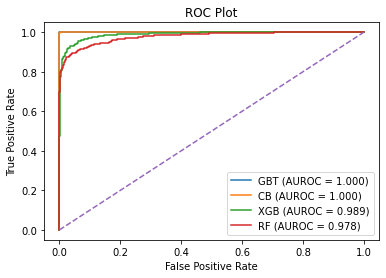

Learning rate set to 0.038758
0:	learn: 0.6684043	total: 44.8ms	remaining: 44.7s
999:	learn: 0.1474931	total: 9.43s	remaining: 0us


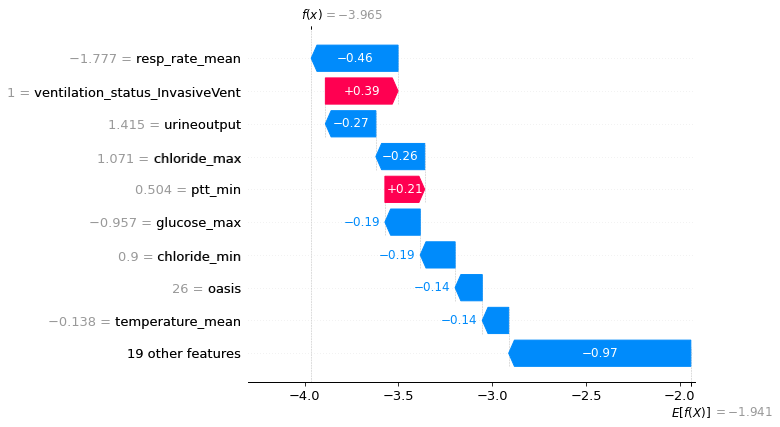

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

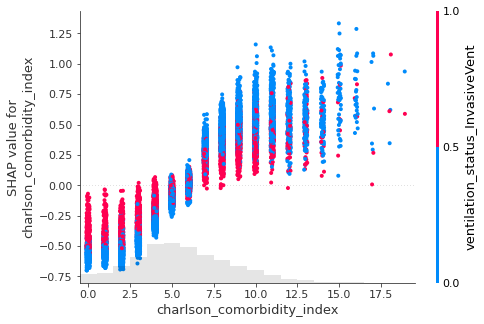

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

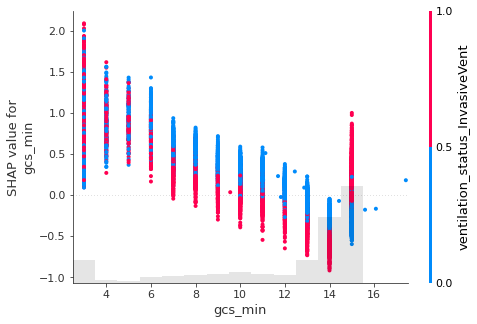

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

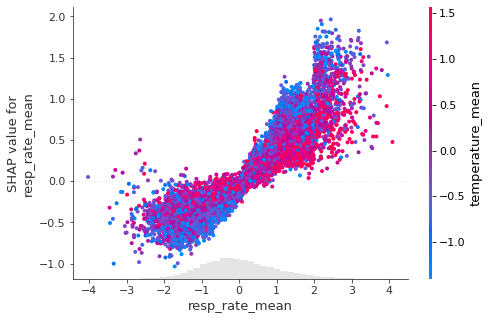

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


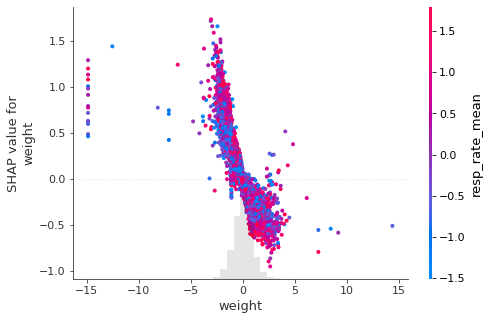

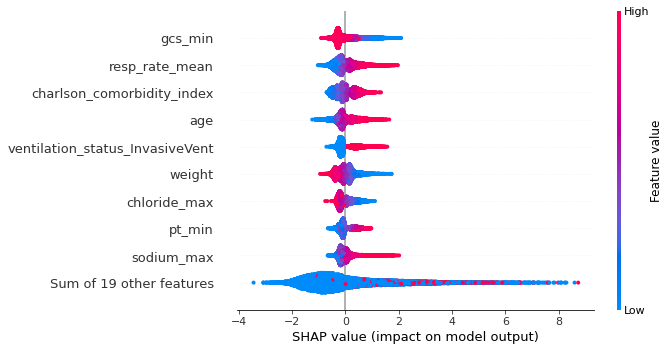

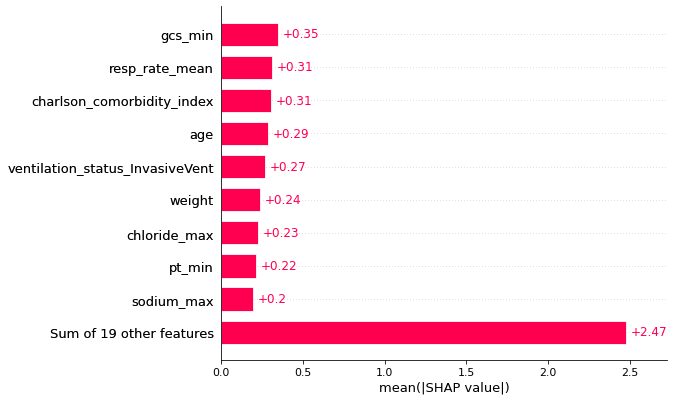

The Intial Population has 53569 Patients
The AKI Cohort has 33146 Patients whereby 20423 Patients were Removed
The Age Restricted Cohort has 31167 Patients where 1979 Patients were removed
The Final Cohort has 24864 Patients and 6303 Patients were removed


In [45]:
if __name__ == '__main__':
    main()